<a href="https://colab.research.google.com/github/nestrada79/MSDA/blob/main/D208/D208_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Research Question

## A. Purpose of Data Analysis

### 1. Research Question Summary

-  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using logistic regression.

> What factors are most predictive of a patient being readmitted to the hospital within a month after their initial discharge?

### 2. Goals of Data Analysis

- Summarize one research question that is relevant to a real-world orDefine the goals of the data analysis.


- To construct a logistic regression model that utilizes available patient data to predict the probability of readmission within 30 days post-discharge.

- To identify and quantify the influence of various factors, such as medical history, demographic details, and hospital services received, on the risk of readmission.

# Part II: Method Justification

## B. Logistic Regression Methods

### 1. Assumptions of Logistic Regression

-   Summarize four assumptions of a logistic regression model.


1. **Binary Outcome**: The dependent variable should be binary (0/1, True/False, Yes/No).

2. **Independence of Observations**: Each observation should be independent of others. There should be no correlation between the observations in the dataset.

3. **No Perfect Multicollinearity**: There should be little or no multicollinearity among the independent variables. High multicollinearity can significantly impact the performance and interpretability of the model.

4. **Linearity of Logit**: The relationship between the logit of the outcome (i.e., the logarithm of odds) and each predictor should be linear. This doesn’t mean that the relationship between the predictors and the outcome is linear, but that the logit transformation of the outcome has a linear relationship with the predictors.

### 2. Benefits of Using Python or R

**Extensive Libraries and Tools:**

Python boasts a diverse ecosystem of libraries and tools designed for data analysis. For logistic regression, libraries such as statsmodels and scikit-learn provide comprehensive methods to build, diagnose, and interpret regression models. This means that I can use these libraries to quickly perform complex tasks without having to code algorithms from scratch.

Statsmodels offers detailed summary statistics of regression models, allowing for in-depth analysis and interpretation of model coefficients, p-values, confidence intervals, and other diagnostic metrics.

**Visualization Capabilities:**

Visualization is a important part of data analysis, especially when diagnosing and interpreting regression models. Python offers libraries like matplotlib and seaborn that excel in creating a wide range of visualizations. These libraries can create everything from basic scatter plots to more intricate residual plots and heatmaps. Such visualizations can help in checking assumptions of linearity, homoscedasticity, and normality of residuals, which are important in multiple linear regression analysis.

### 3. Appropriateness of Logistic Regression

-  Explain why logistic regression is an appropriate technique to analyze the research question summarized in part I.

Logistic regression is suitable for this research question because it can effectively model the probability of a binary outcome (readmission or not) based on a set of predictors, providing insights into which factors are most predictive of hospital readmission.

1. **Binary Outcome**: Logistic regression is designed for binary (two-outcome) dependent variables. In this case, the outcome of interest is whether a patient is readmitted (yes or no) within a month, which fits perfectly into the binary framework.

2. **Estimation of Probabilities**: Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability of occurrence of an event. It is good for scenarios where we want to understand the likelihood of an event happening, such as the likelihood of readmission.

3. **Relationship between Predictors and Outcome**: Logistic regression allows for the analysis of how various predictor variables (like age, medical history, treatment received, etc.) affect the probability of readmission. This helps in identifying which factors are most influential.

4. **Handling of Non-Linear Relationships**: Many relationships between predictors and a binary outcome are non-linear. Logistic regression can handle these non-linear relationships by modeling the log-odds of the outcome, thus providing a more accurate analysis than linear regression in such cases.

5. **Interpretability of Results**: The results of logistic regression are interpretable in terms of odds ratios. This makes it easier to understand the impact of each predictor variable on the likelihood of readmission.


# Part III: Data Preparation

## C. Data Preparation Process

In [38]:
#Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

### 1. Data Cleaning Goals and Steps

-  Describe your data cleaning goals and the steps used to clean the data to achieve the goals that align with your research question including the annotated code.

**Goals:**

**Identify and Handle Missing Values:** Ensure that the dataset does not have any gaps or missing data that could compromise the analysis.

**Check for Duplicates:** Ensure there's no redundancy in the data. Remove any duplicate rows if found.

**Ensure Appropriate Data Types:** Confirm that each column's data type aligns with the nature of the data it contains.

**Remove Irrelevant Columns:** Eliminate columns that don't contribute value to the research question to make the dataset and subsequent analysis more focused.


In [39]:
#Load dataset into pandas dataframe
#Reloading dataframe at this point to make the cleaning process easier to roll back without having to rerun any previous analysis
medical_data = pd.read_csv('/content/medical_clean.csv')

In [ ]:
#Visually inspecting the first 10 rows
medical_data.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
5,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.691180,12742.589910,4,5,4,4,3,5,4,6
6,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.627161,16815.513600,4,3,3,2,3,4,5,5
7,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.499039,6930.572138,1,2,2,5,4,2,4,2
8,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.402860,8363.187290,3,3,2,3,3,3,4,2
9,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40325,-94.71424,5840,Urban,America/Chicago,"Production assistant, radio",2,78,38965.22,Never Married,Female,No,18.224324,7,1,2,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,Yes,Yes,Yes,Blood Work,1.632554,3147.855813,2622

#### Data Cleaning Steps

In [ ]:
# 1. Check for missing values
missing_values = medical_data.isnull().sum()
missing_values

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [ ]:
# 2. Check for duplicates
duplicate_rows = medical_data.duplicated().sum()
duplicate_rows

0

In [ ]:
# 3. Check data types of columns
data_types = medical_data.dtypes
data_types

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

**Findings**
- There are no missing values in the dataset.
- There are no duplicate rows in the dataset.
- The data types seem appropriate for each column, with a mix of numerical (int64 and float64) and categorical (object) data types.<P>

There are a few columns that are not relevant to the research question so they will need to be dropped. These include **CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, TimeZone**

**Item1,	Item2,	Item3, Item4,	Item5,	Item6,	Item7** and	**Item8** will also be removed because they are not needed. These are survey items that related to patient satisfaction and logically do not have the ability to affect whether a patient gets readmitted or. While there might be some correlation between patient satisfaction scores and whether a patient is at risk of being readmitted including these scores may skew the analysis. If I was asking a research question like do patients who receive better service as measured by customer satisfaction survey have better outcomes with few readmissions then it might make sense to leave them in. But this is outside the scope of my research question.

Instinctively I want to remove **Job** from my analysis for similar reasons but I suspect there might be some relationship between a patient's job and their access to preventative medical which may reduce readmissions so I am leaving it in at this stage.



In [40]:
# Columns to be dropped from the dataset
columns_to_drop = [
    'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone',
    'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'
]

# Dropping the irrelevant columns
medical_data_cleaned = medical_data.drop(columns=columns_to_drop)

# Display the shape of the dataset after dropping the columns
medical_data_cleaned.shape


(10000, 31)

### 2. Summary Statistics of Variables

- Describe the dependent variable and all independent variables using summary statistics that are required to answer the research question, including a screenshot of the summary statistics output for each of these variables.

In [ ]:
# Recalculating summary statistics for the cleaned dataset
summary_statistics_cleaned = medical_data_cleaned.describe(include='all').transpose()

# Displaying summary statistics for the cleaned dataset
summary_statistics_cleaned


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Population,10000.0,NaN,NaN,NaN,9965.2538,14824.758614,0.0,694.75,2769.0,13945.0,122814.0
Area,10000,3,Rural,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,10000,639,Outdoor activities/education manager,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Children,10000.0,NaN,NaN,NaN,2.0972,2.163659,0.0,0.0,1.0,3.0,10.0
Age,10000.0,NaN,NaN,NaN,53.5117,20.638538,18.0,36.0,53.0,71.0,89.0
Income,10000.0,NaN,NaN,NaN,40490.49516,28521.153293,154.08,19598.775,33768.42,54296.4025,207249.1
Marital,10000,5,Widowed,2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,3,Female,5018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReAdmis,10000,2,No,6331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VitD_levels,10000.0,NaN,NaN,NaN,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449


### Dependent Variable (Target):

- **ReAdmis**: This variable represents whether the patient was readmitted within a month of release or not. Since my research question focuses on predicting readmission, this is my dependent variable (also known as the target variable in predictive modeling).

After one-hot encoding ReAdmis_Yes will become the dependent variable. It indicates whether a patient was readmitted within a month of release (1 for yes, 0 for no).

### Independent Variables (Predictors):

- **Demographic Information**: 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender'
- **Health and Medical History**: 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'
- **Hospitalization Details**: 'Initial_admin', 'Services', 'Initial_days', 'TotalCharge', 'Additional_charges'

These independent variables will be used to build a logistic regression model to predict the likelihood of readmission (the dependent variable). The model will help determine which factors are most significant in predicting readmission.

**Quantitative Columns:**

| Column      | Details                                                                                   |
|-------------|-------------------------------------------------------------------------------------------|
| Population  | Ranges from 0 to 122,814 with an average of approximately 9,965.                          |
| Children    | Ranges from 0 to 10 with an average of approximately 2.1.                                 |
| Age         | Ranges from 18 to 89 years with an average age of approximately 53.5 years.               |
| Income      | Ranges from \$154.08 to \$207,249.10 with an average income of approximately $40,490.50.    |
| VitD_levels | Ranges from 9.81 to 26.39 with an average of approximately 17.96.                         |
| Doc_visits  | Ranges from 1 to 9 with an average of 5 visits.                                          |
| TotalCharge | Ranges from \$1,938.31 to \$9,180.73 with an average charge of approximately \$5,312.17.     |

**Categorical Columns:**

| Column      | Details                                                                                   |
|-------------|-------------------------------------------------------------------------------------------|
| Area        | Three unique values (Suburban, Urban, Rural), with Rural being the most frequent.         |
| Job         | 639 unique values with Outdoor activities/education manager being the most frequent. |
| Marital     | Five unique statuses, with Widowed being the most frequent.                               |
| Gender      | Three unique values, with Female being the most frequent.                                 |
| ReAdmis     | Two unique values (Yes, No), with No being the most frequent.                             |
| Arthritis   | Two unique values (Yes, No).                                                             |
| Diabetes    | Two unique values (Yes, No).                                                             |
| Hyperlipidemia | Two unique values (Yes, No).                                                          |
| BackPain    | Two unique values (Yes, No).                                                             |
| Anxiety     | Two unique values (Yes, No).                                                             |
| Allergic_rhinitis | Two unique values (Yes, No).                                                        |
| Reflux_esophagitis | Two unique values (Yes, No).                                                       |
| Asthma      | Two unique values (Yes, No).                                                             |
| Services    | Four unique services, with Blood Work being the most frequent.                            |

Based on the summary statistics I will choose to remove Job at this point because it has too many unique values making it unsuitable for this particular application. If I wanted to reinvestigate this relationship at a future point I would opt to cluster together the job occupations into broader categories such as professional vs laborer or by industry type.


In [41]:
# Dropping the Job column
medical_data_cleaned = medical_data_cleaned.drop('Job',axis=1)

medical_data_cleaned.columns.tolist()

['Population',
 'Area',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges']

### 3. Univariate and Bivariate Visualizations

- Generate univariate and bivariate visualizations of the distributions of the dependent and independent variables, including the dependent variable in your bivariate visualizations.

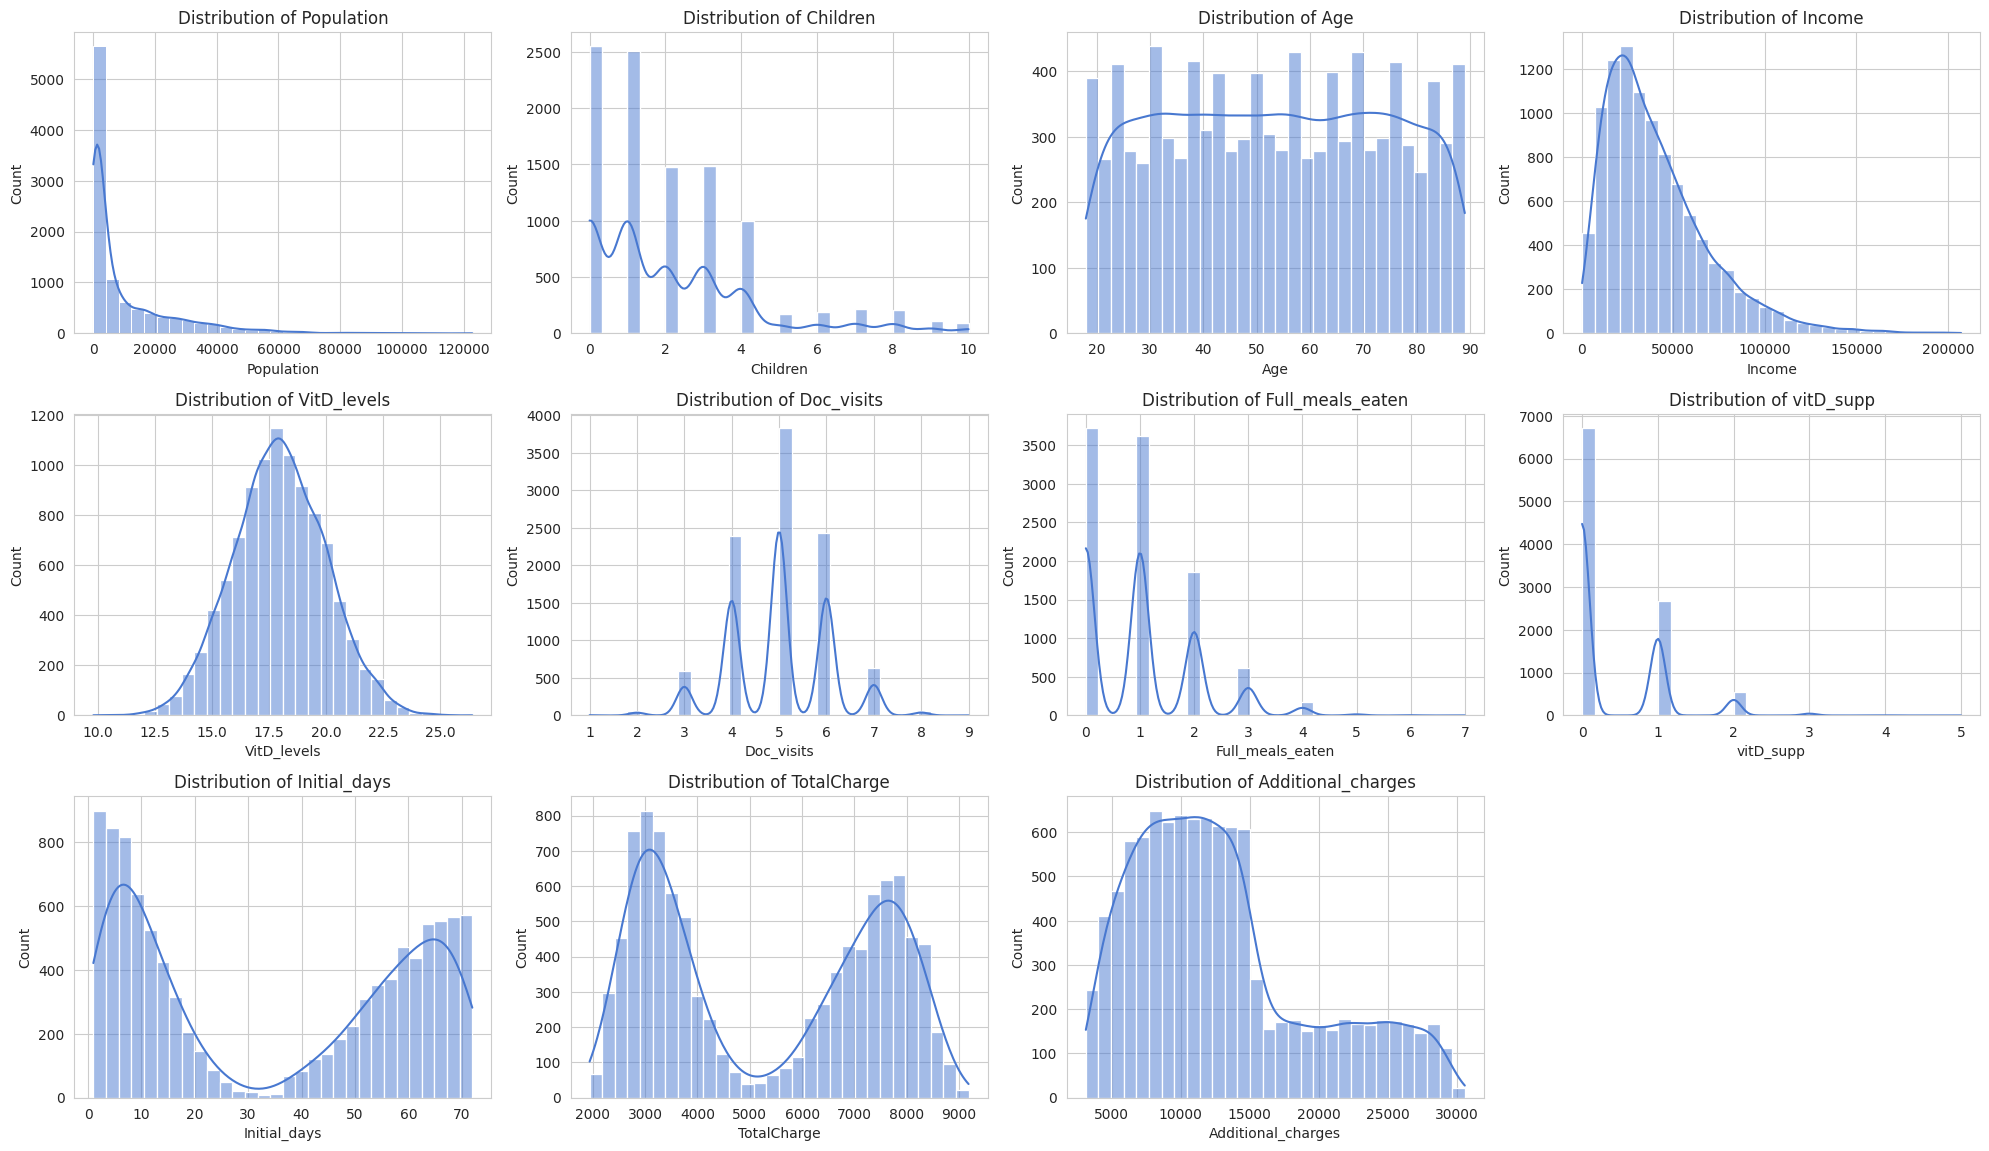

In [ ]:
# List of numerical variables
numerical_variables = medical_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plotting histograms for each numerical variable
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(4, 4, i)
    sns.histplot(medical_data_cleaned[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plt.show()

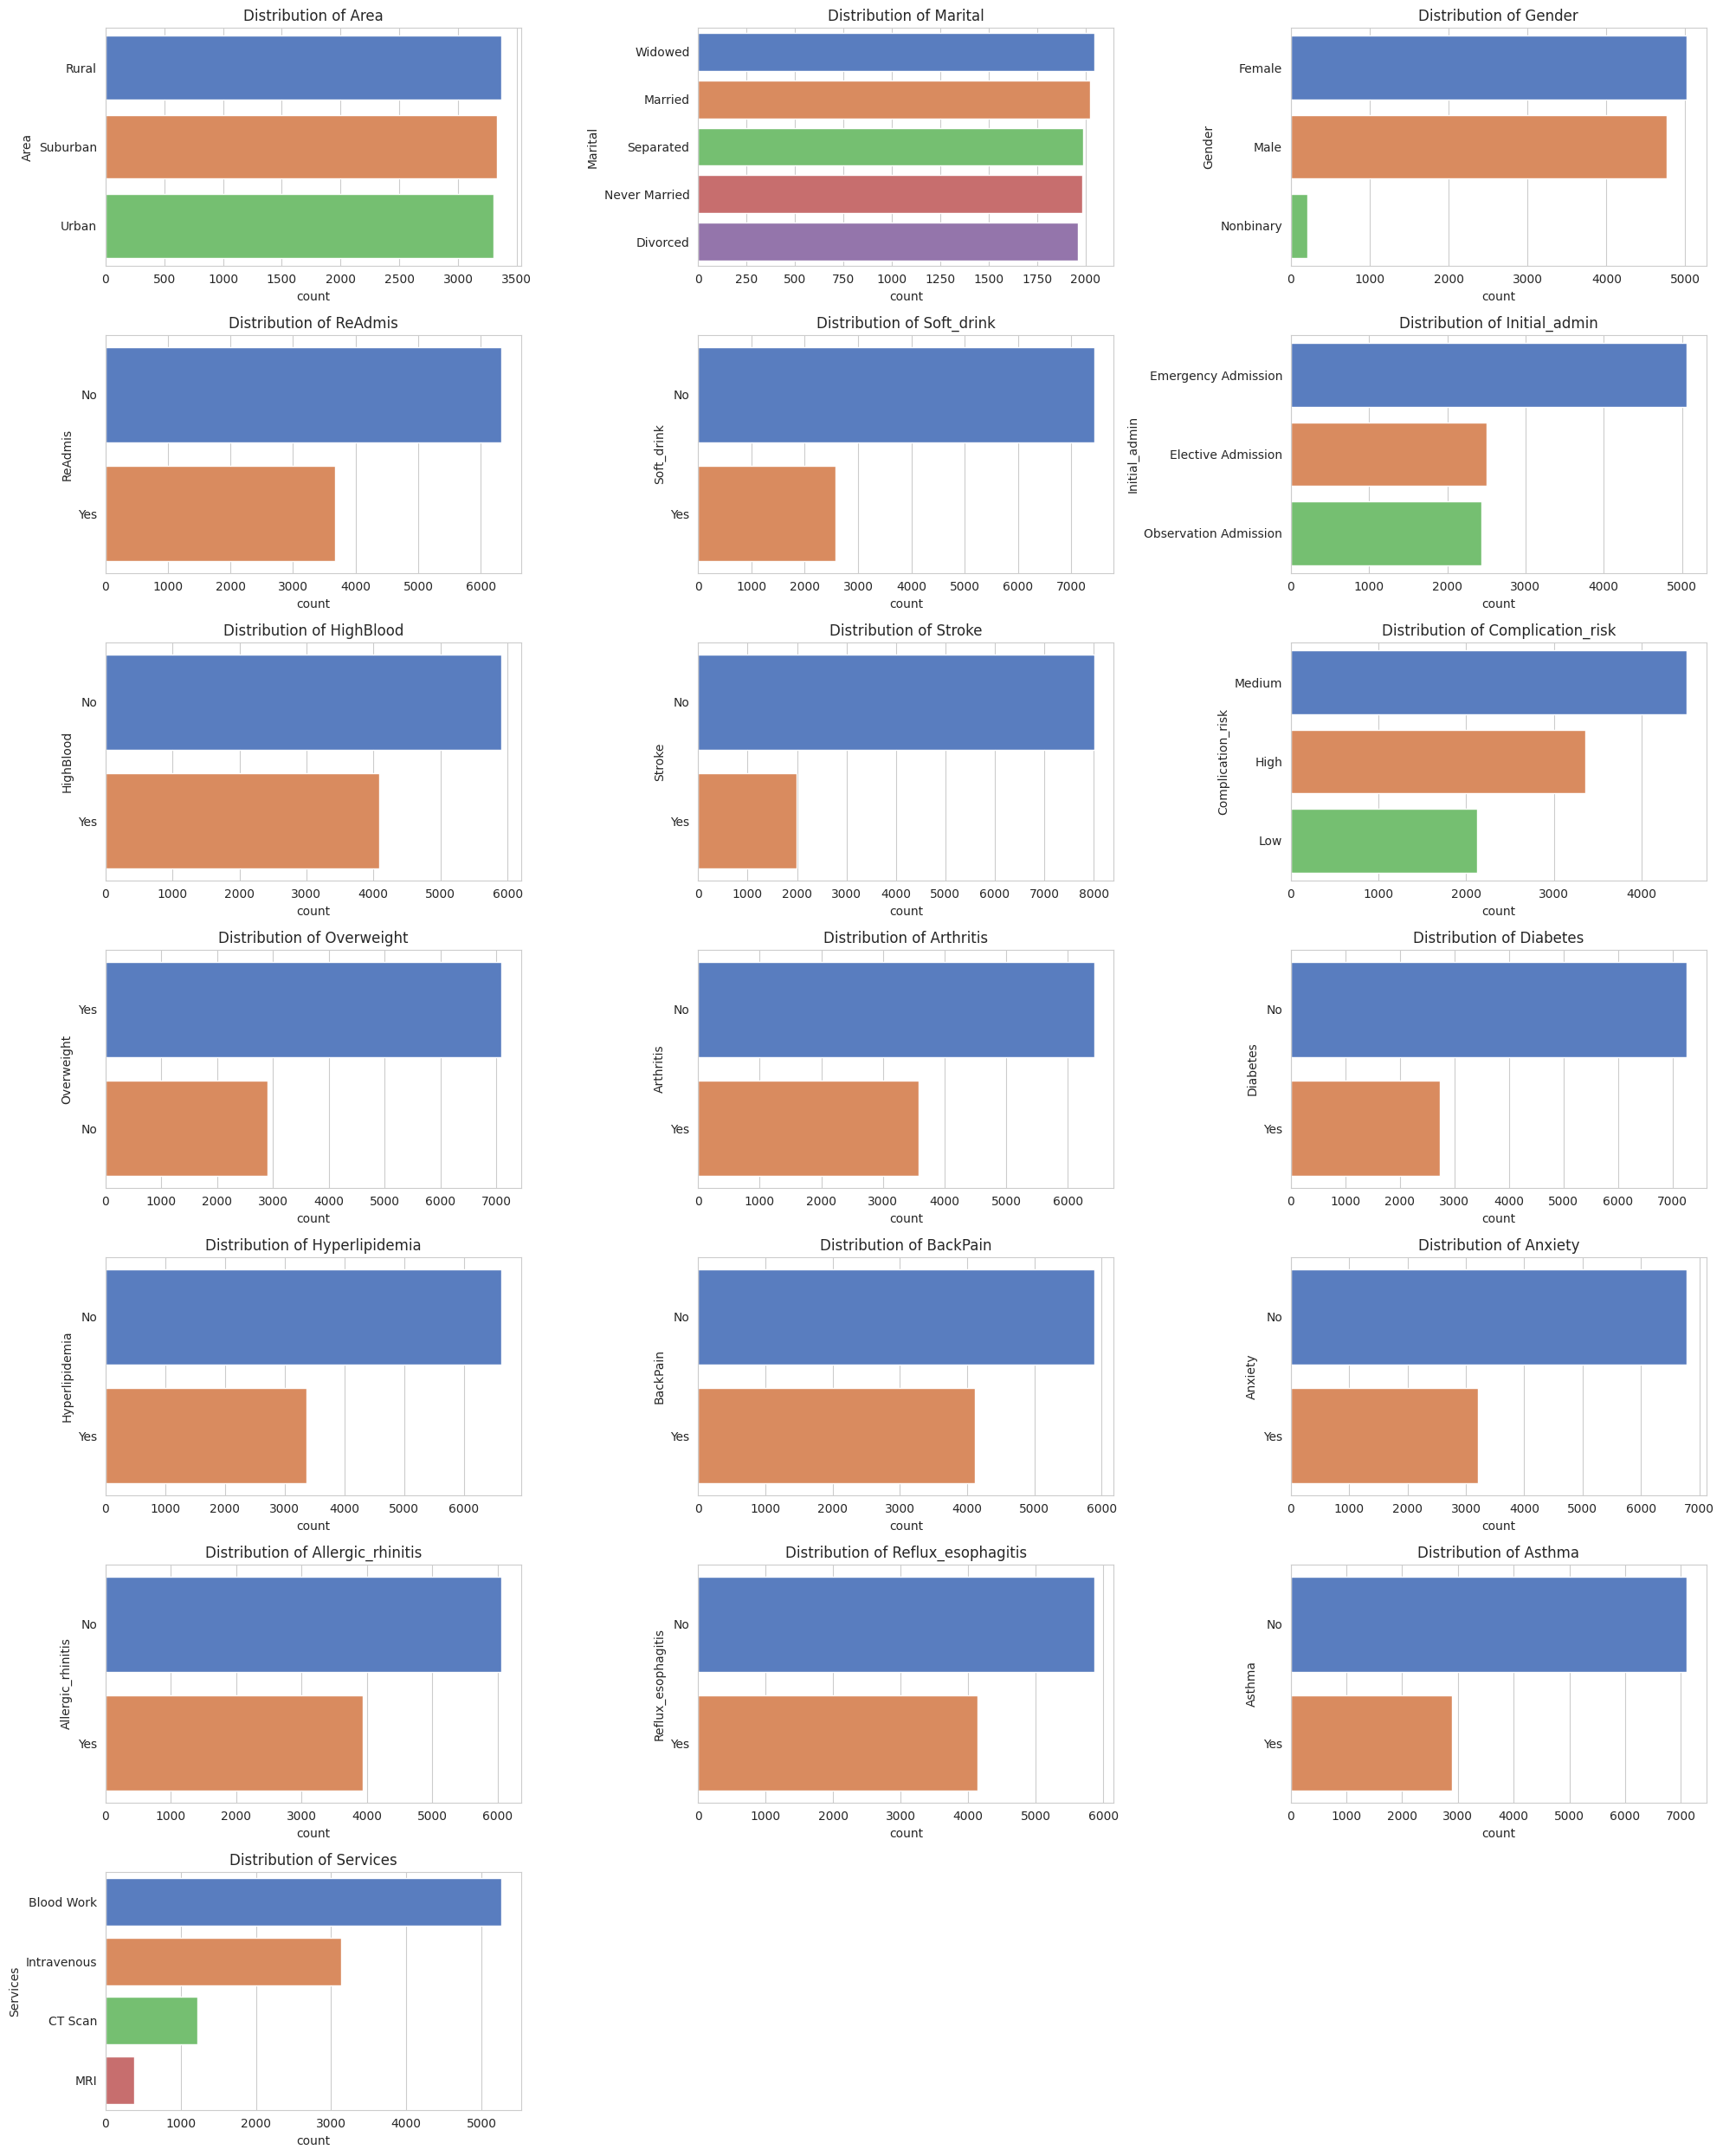

In [ ]:
# List of categorical variables
categorical_variables = medical_data_cleaned.select_dtypes(include=['object']).columns

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Create a figure to accommodate all categorical variables
plt.figure(figsize=(20, 25))

# Plotting bar plots for each categorical variable
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(7, 3, i)
    sns.countplot(y=medical_data_cleaned[var], order=medical_data_cleaned[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plt.show()

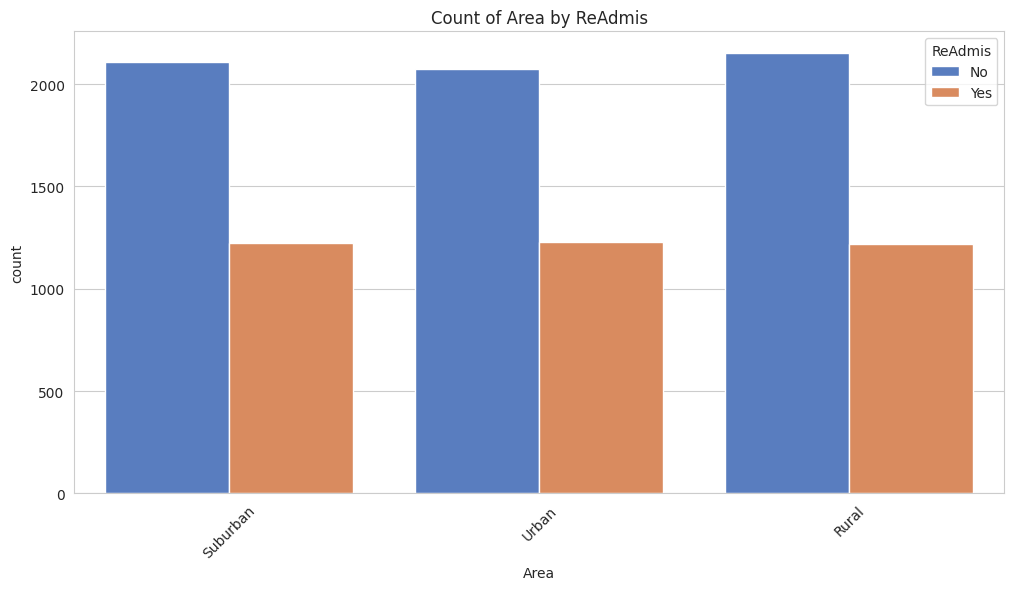

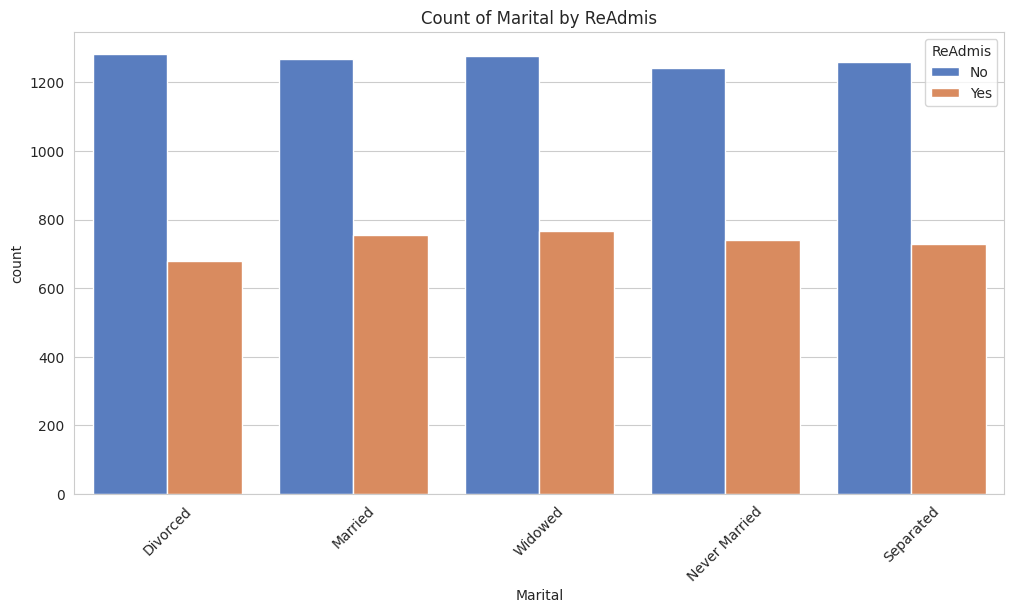

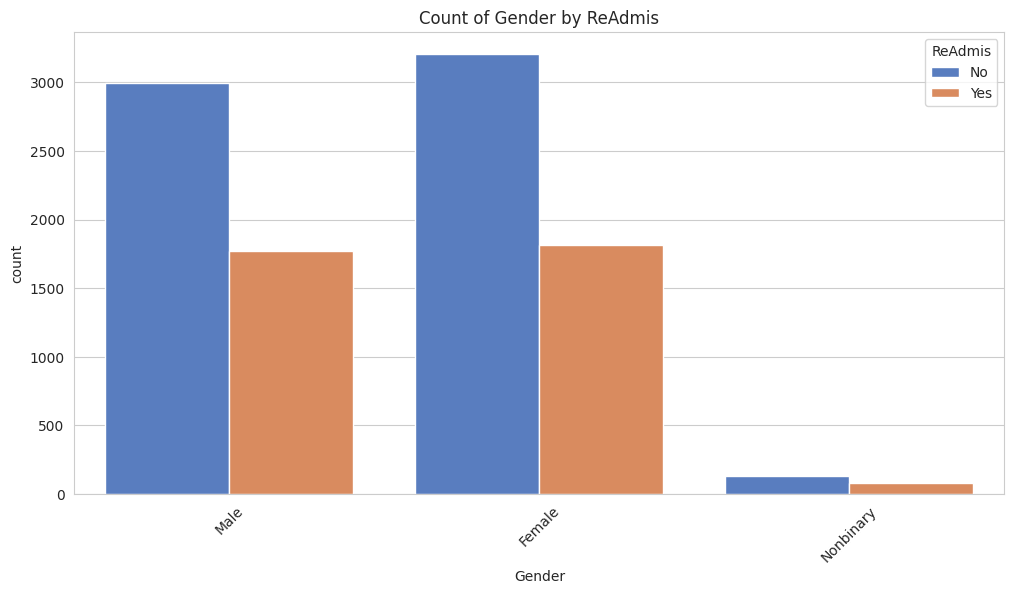

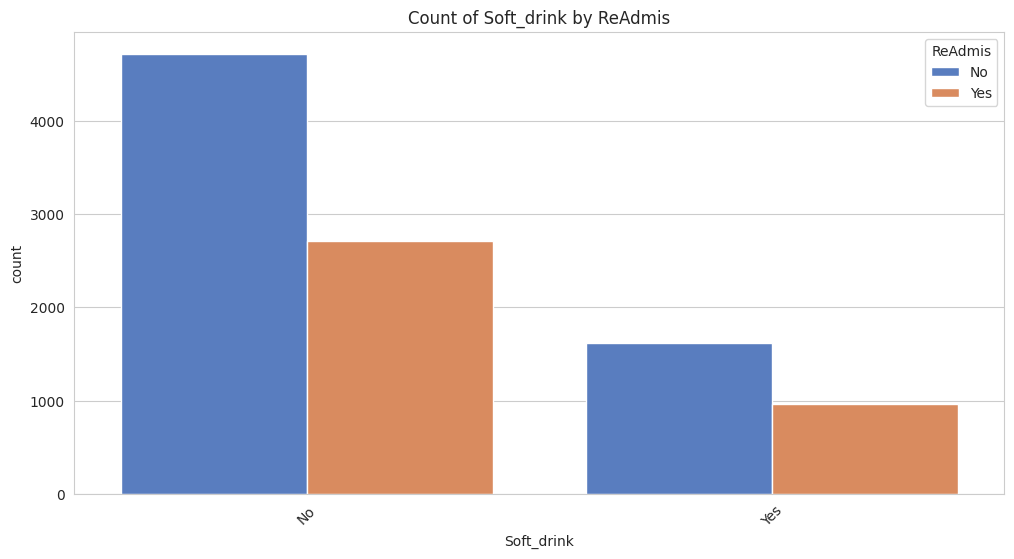

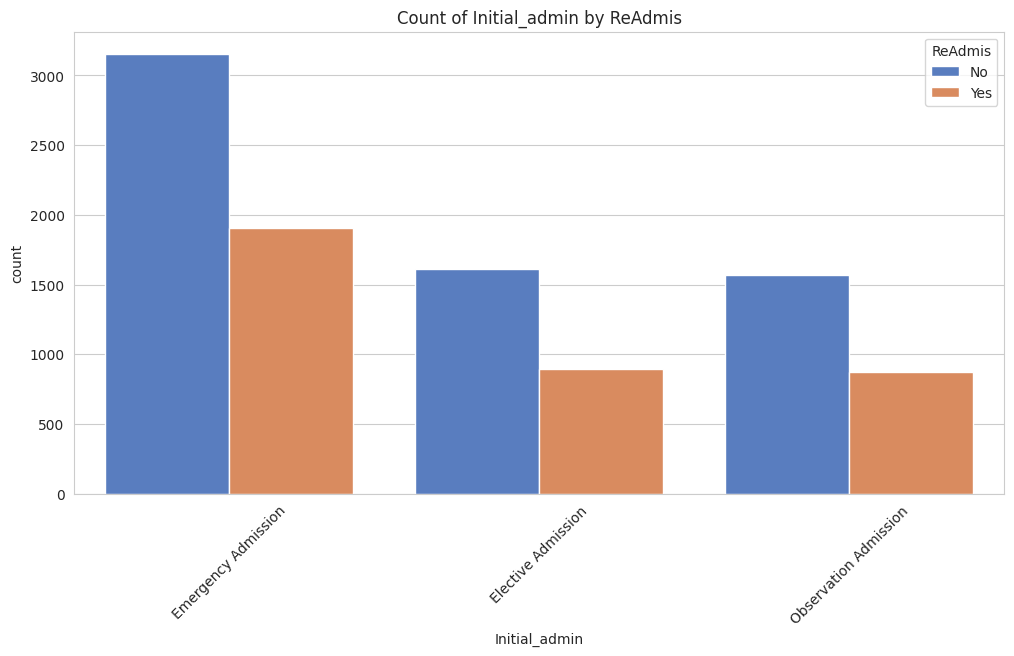

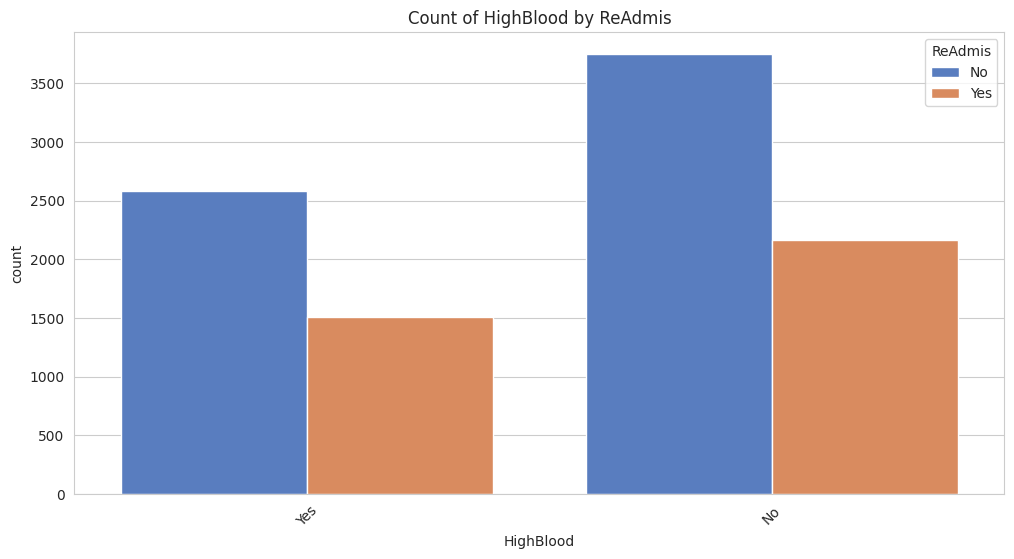

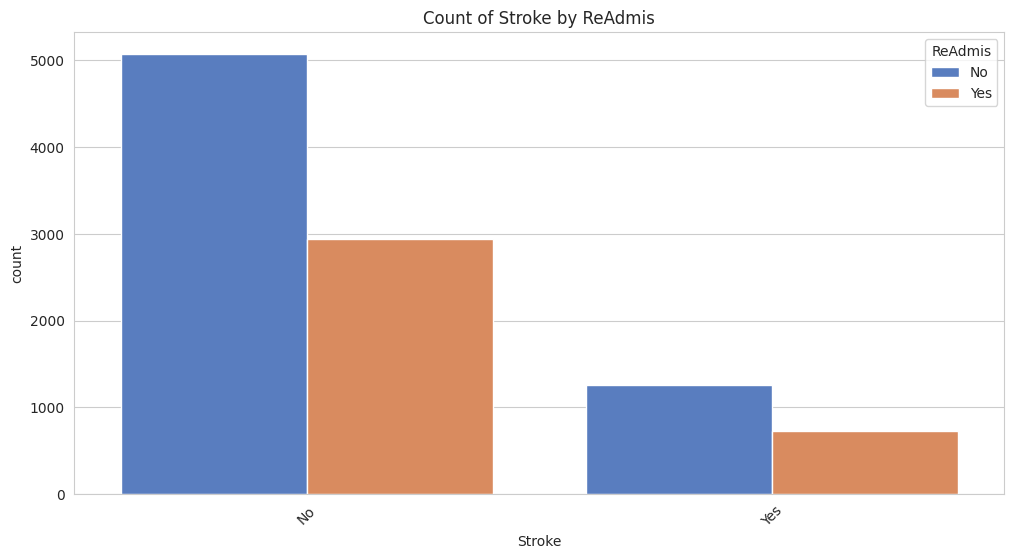

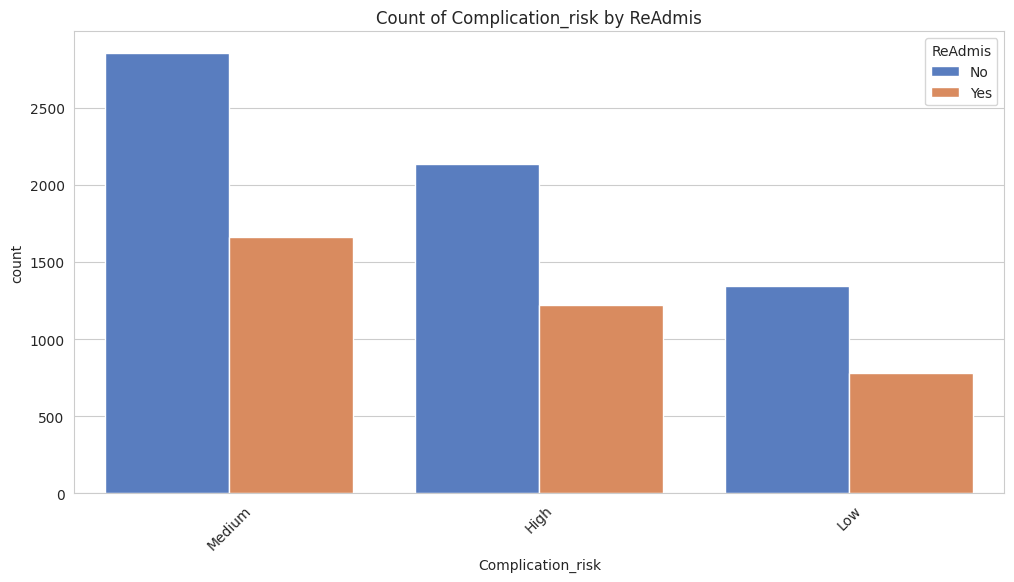

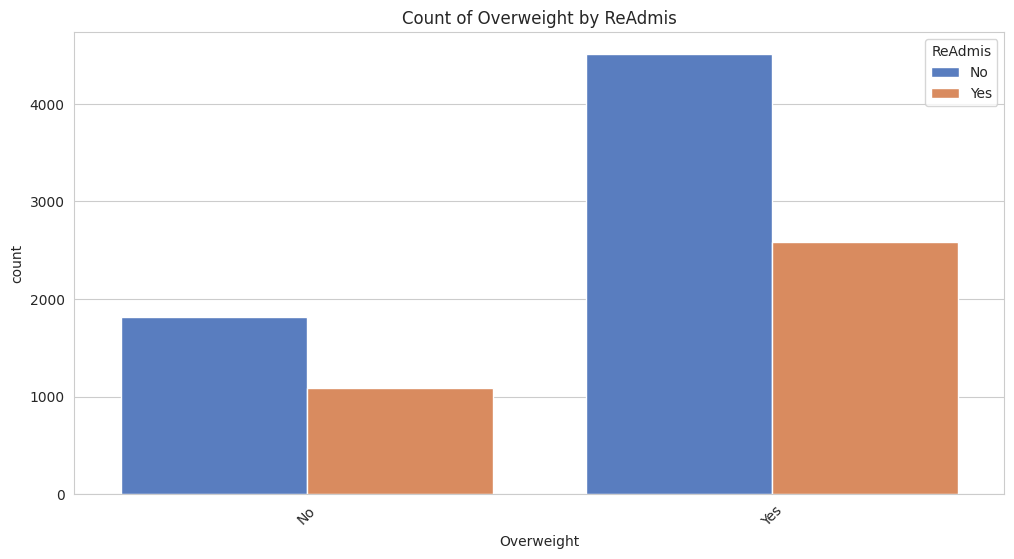

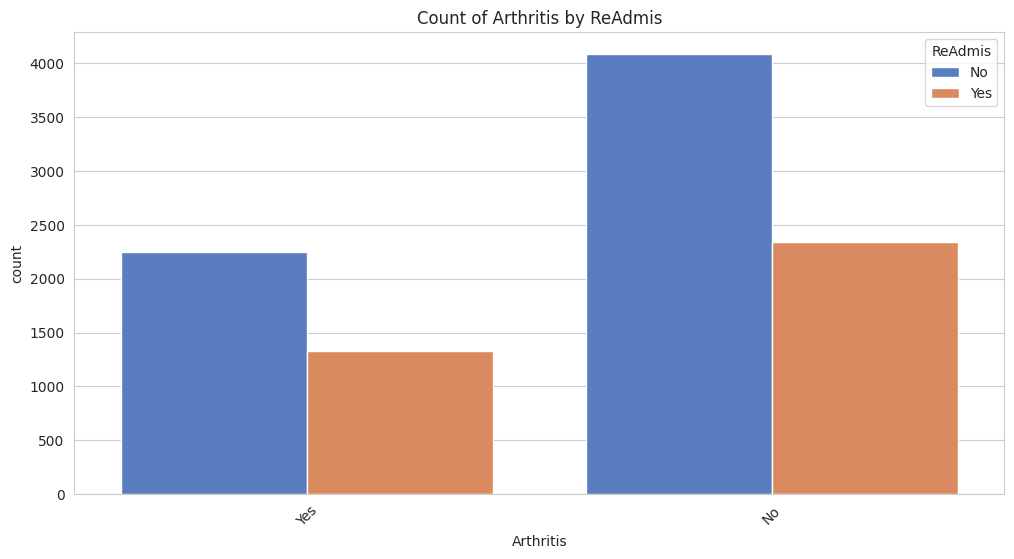

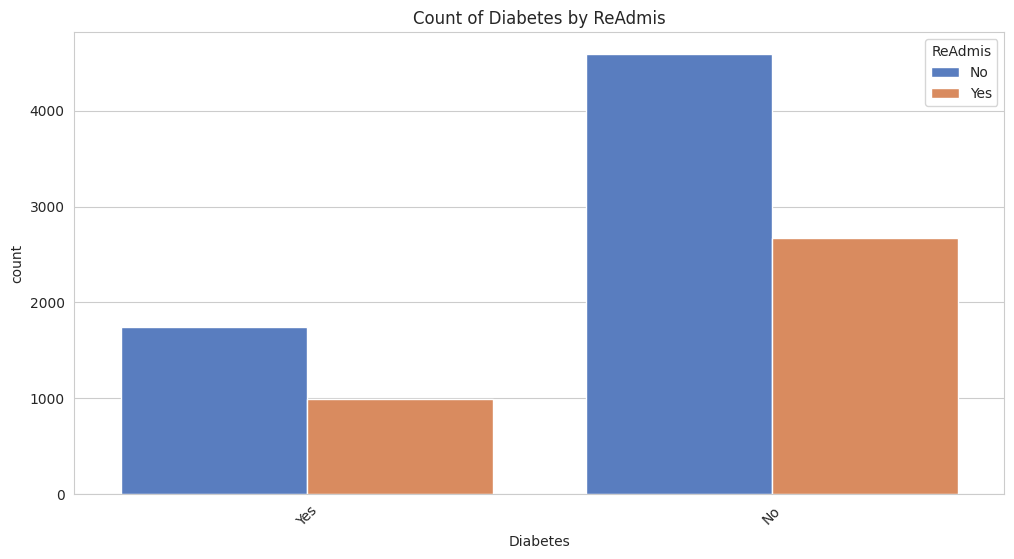

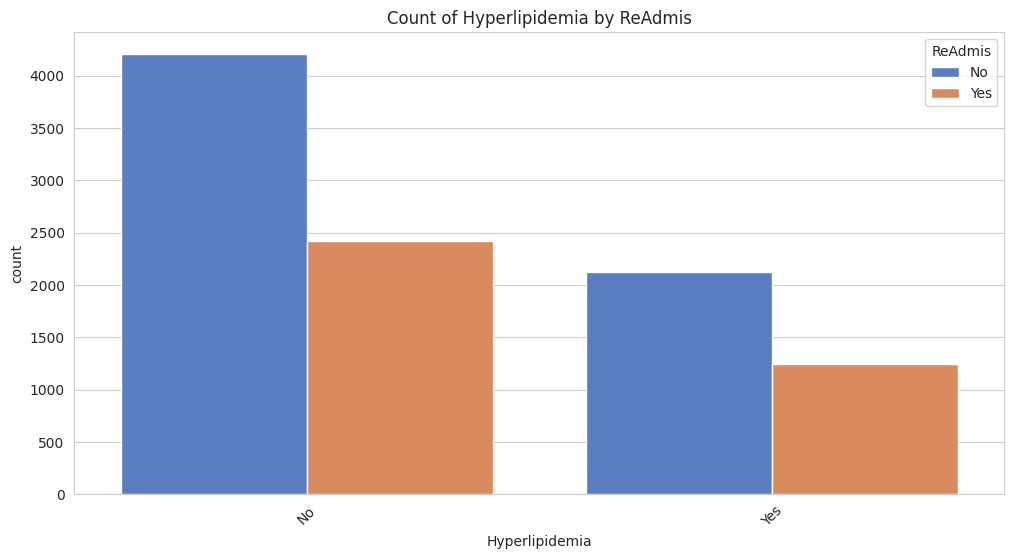

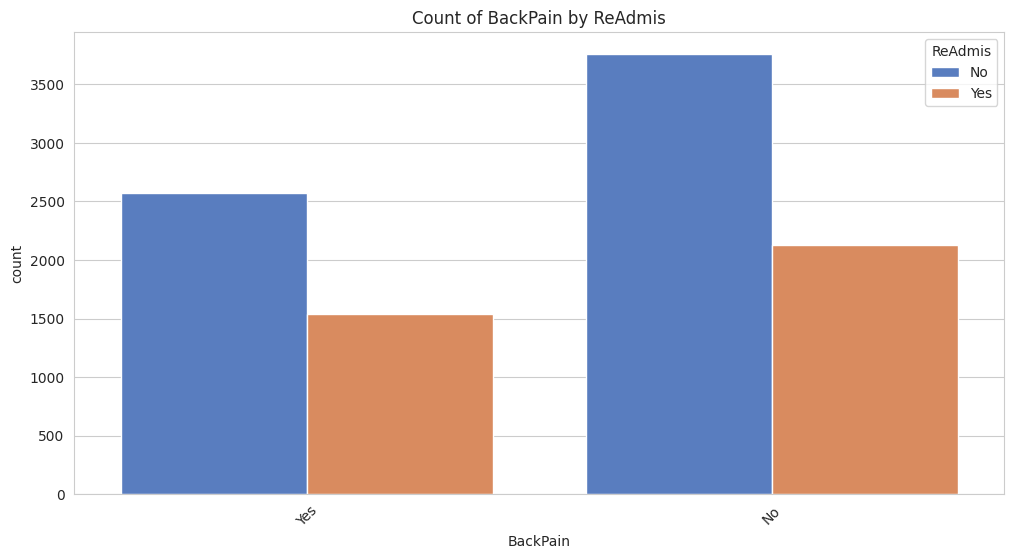

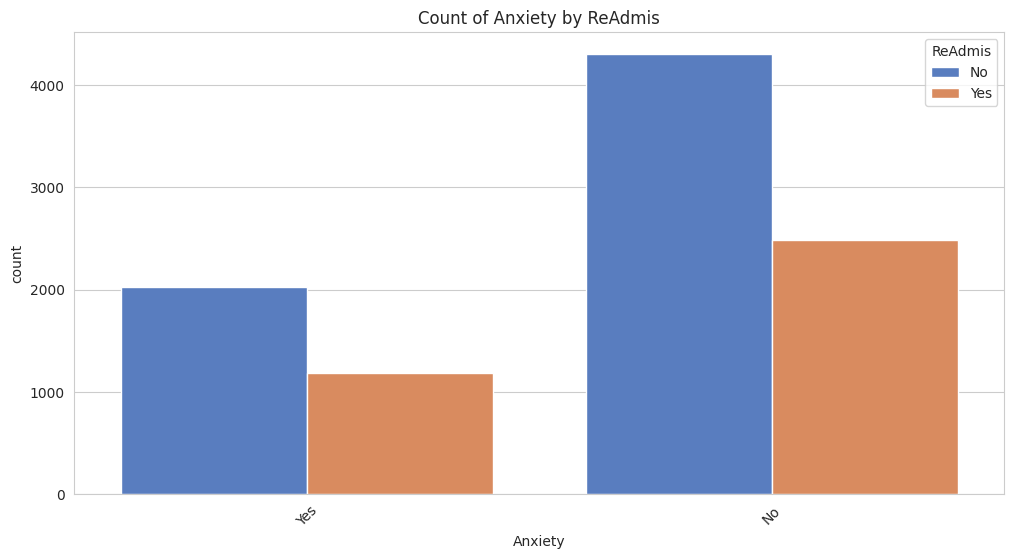

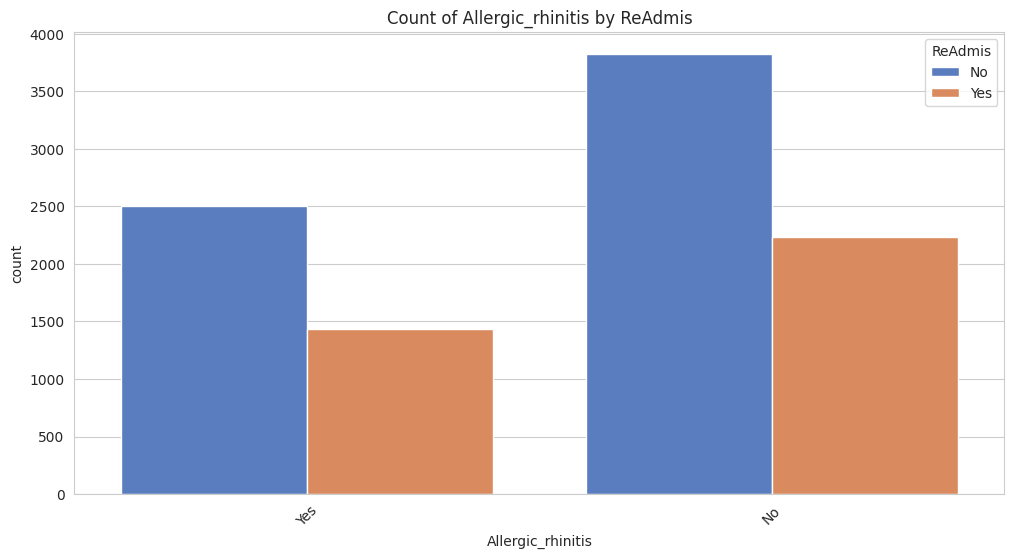

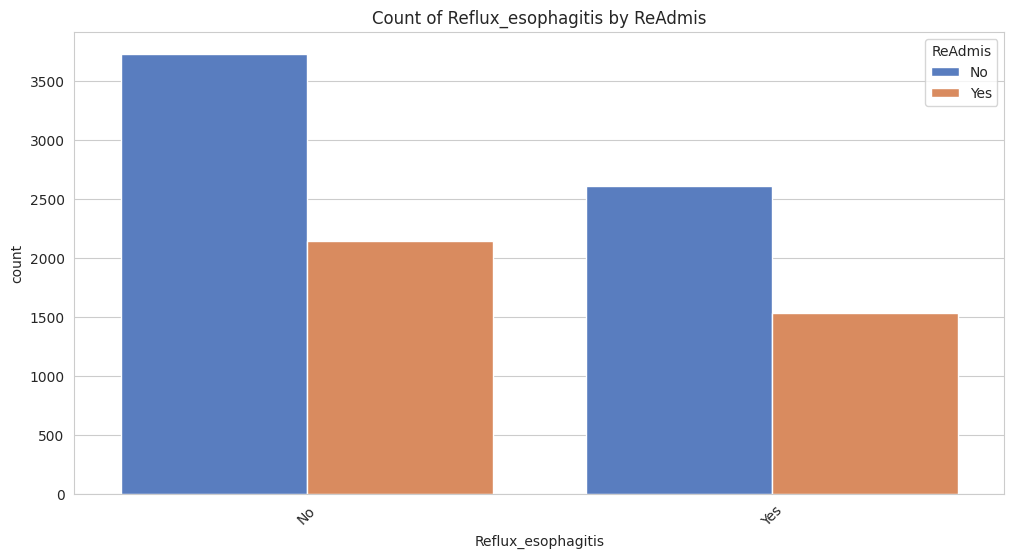

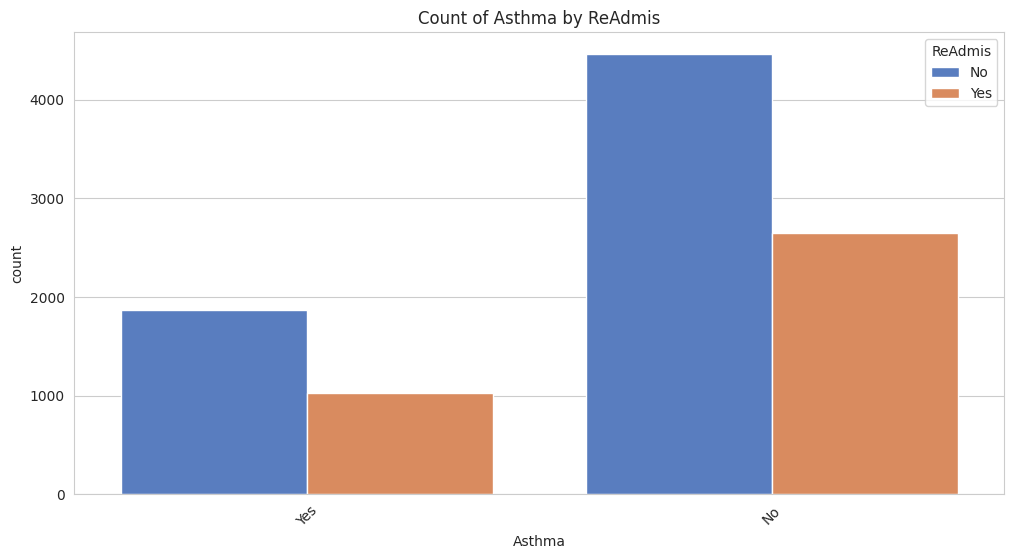

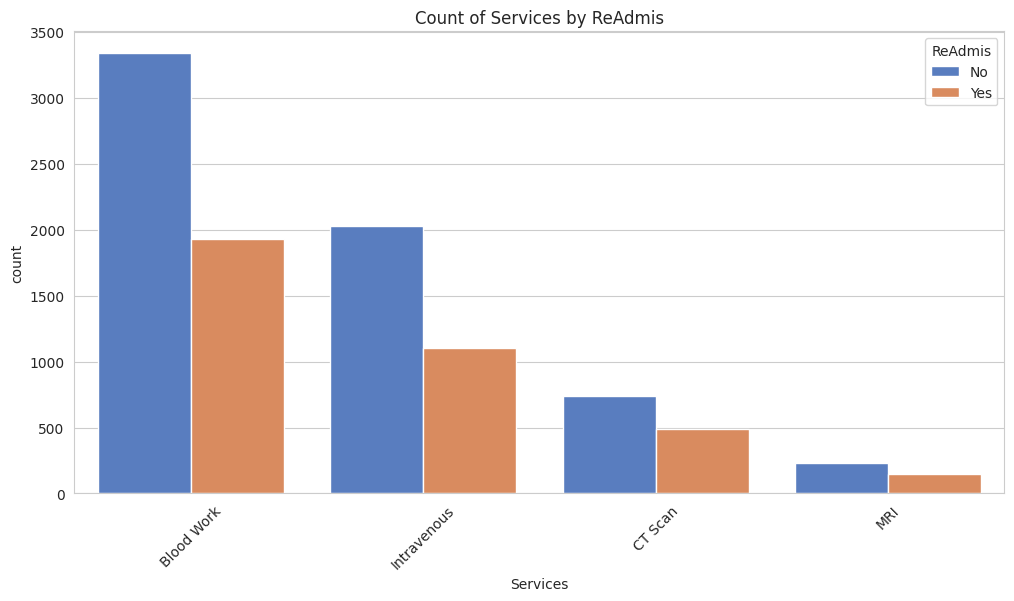

In [ ]:
# Visualizing categorical variables against 'ReAdmis'
categorical_columns = medical_data_cleaned.select_dtypes(include=['object']).columns.drop('ReAdmis')  # Exclude the dependent variable itself

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, hue='ReAdmis', data=medical_data_cleaned)
    plt.title(f'Count of {column} by ReAdmis')
    plt.xticks(rotation=45)
    plt.show()

### 4. Data Transformation Goals and Steps

-  Describe your data transformation goals that align with your research question and the steps used to transform the data to achieve the goals, including the annotated code.

**Data Transformation Goals**:

1. **Ensure Data Completeness and Quality**: Ensure that the dataset is free from missing values and duplicates which can skew the analysis.
2. **Feature Selection for Relevance**: Exclude variables that do not provide meaningful information in predicting readmission risk.
3. **Convert Categorical Variables**: Transform categorical variables into a format suitable for regression modeling.
4. **Standardize Numerical Variables**: Ensure that numerical variables are on a comparable scale, making coefficients in the regression model interpretable.

**Steps Taken**:

1. **Data Cleaning**:
   - Checked and confirmed that there were no missing values in the dataset.
   - Checked for duplicate rows and found none.
   - Examined the data types of each column to ensure they align with their expected types.
   - Dropped irrelevant columns that were not pertinent to the research question, such as identifiers (`CaseOrder`, `Customer_id`, etc.), geographic details (`City`, `State`, etc.), and other columns like `Job` and survey items (`Item1` to `Item8`).

2. **Encoding Categorical Variables**:
   - Identified categorical variables in the dataset, including `Gender`, `MaritalStatus`, and others.
   - Used one-hot encoding to transform these categorical variables into binary columns, where each category is represented by a separate column.

3. **Scaling Numerical Variables**:
   - Identified numerical independent variables such as `Age`, `Income`, and `VitD_levels`.
   - Used Standard Scaling to transform these numerical variables, resulting in values with a mean of 0 and a standard deviation of 1. This ensures that all variables are on a comparable scale, which is crucial for interpreting the coefficients in a regression model.
  
  - The formula used is \( z = \frac{(x - \mu)}{\sigma} \), where \( \mu \) is the mean and \( \sigma \) is the standard deviation of the dataset.
  - If a value \( x \) is below the mean \( \mu \) of the dataset, the scaled value \( z \) will be negative.
  - If a value \( x \) is above the mean, the scaled value will be positive.

In [42]:
# Identify the original numerical variables
original_numerical_vars = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
                           'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

# One-hot encoding the categorical variables
categorical_data = medical_data_cleaned.drop(original_numerical_vars, axis=1)
medical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)

# Initialize the standard scaler
scaler = StandardScaler()

# Scale the numerical variables
scaled_numerical_data = scaler.fit_transform(medical_data_cleaned[original_numerical_vars])

# Convert the scaled numerical data back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=original_numerical_vars)

# Concatenate scaled numerical variables with one-hot encoded variables
medical_transformed = pd.concat([scaled_numerical_df, medical_data_encoded], axis=1)

# Display the first few rows of the final dataset
medical_transformed.head()


,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,ReAdmis_Yes,Soft_drink_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_Yes,Stroke_Yes,Complication_risk_Low,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,0
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


### 5. Prepared Data Set CSV

- Supply the cleaned and prepared dataset in CSV format.


In [43]:
# Save the DataFrame as a CSV file
medical_transformed.to_csv('medical_transformed.csv', index=False)


# Part IV: Model Comparison and Analysis

## D. Initial and Reduced Model Comparison

### 1. Initial Logistic Regression Model

 - Construct an initial logistic regression model from all independent variables that were identified in part C2.

In [44]:
data = medical_transformed

In [45]:
#Checking that my dependant variable is binary and verifying the datatype prior to running the model
print(data['ReAdmis_Yes'].value_counts())

0    6331
1    3669
Name: ReAdmis_Yes, dtype: int64


In [52]:
# Define the independent variables (X) and dependent variable (y)
X = data.drop('ReAdmis_Yes', axis=1)
y = data['ReAdmis_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the logistic regression model
model = LogisticRegression(max_iter=1000)  # max_iter may need to be adjusted
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)

# Displaying the classification report for the initial model
print(f"Classification Report for the Initial Logistic Regression Model:\n{report}")



Classification Report for the Initial Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1934
           1       0.98      0.98      0.98      1066

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [53]:
# Model Coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"  Coefficient for {feature}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}\n")

# Odds Ratios
odds_ratios = np.exp(coefficients)
print("Odds Ratios:")
for feature, odds in zip(X.columns, odds_ratios):
    print(f"  Odds Ratio for {feature}: {odds:.4f}")

# ROC Curve and AUC
probabilities = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probabilities)
print(f"\nArea Under Curve (AUC): {auc:.4f}")


Model Coefficients:
  Coefficient for Population: 0.0343
  Coefficient for Children: 0.0638
  Coefficient for Age: -0.0183
  Coefficient for Income: 0.0719
  Coefficient for VitD_levels: 0.0931
  Coefficient for Doc_visits: -0.0551
  Coefficient for Full_meals_eaten: 0.0381
  Coefficient for vitD_supp: -0.0491
  Coefficient for Initial_days: 9.6848
  Coefficient for TotalCharge: 8.8760
  Coefficient for Additional_charges: 0.1123
  Coefficient for Area_Suburban: 0.1865
  Coefficient for Area_Urban: 0.0026
  Coefficient for Marital_Married: 0.0694
  Coefficient for Marital_Never Married: 0.3151
  Coefficient for Marital_Separated: -0.1142
  Coefficient for Marital_Widowed: 0.1319
  Coefficient for Gender_Male: 0.1078
  Coefficient for Gender_Nonbinary: 0.2734
  Coefficient for Soft_drink_Yes: 0.0882
  Coefficient for Initial_admin_Emergency Admission: -0.7290
  Coefficient for Initial_admin_Observation Admission: 0.4014
  Coefficient for HighBlood_Yes: -0.1141
  Coefficient for Stroke_

In [57]:
# Get the intercept and coefficients
intercept = model.intercept_[0]
coefficients = model.coef_[0]
features = X_train.columns

# Print the regression equation in a more readable format
print("Regression Equation:\nlog(p/1-p) = {:.4f}".format(intercept))
for coef, feature in zip(coefficients, features):
    print("            + ({:.4f} * {})".format(coef, feature))

Regression Equation:
log(p/1-p) = -13.5479
            + (0.0343 * Population)
            + (0.0638 * Children)
            + (-0.0183 * Age)
            + (0.0719 * Income)
            + (0.0931 * VitD_levels)
            + (-0.0551 * Doc_visits)
            + (0.0381 * Full_meals_eaten)
            + (-0.0491 * vitD_supp)
            + (9.6848 * Initial_days)
            + (8.8760 * TotalCharge)
            + (0.1123 * Additional_charges)
            + (0.1865 * Area_Suburban)
            + (0.0026 * Area_Urban)
            + (0.0694 * Marital_Married)
            + (0.3151 * Marital_Never Married)
            + (-0.1142 * Marital_Separated)
            + (0.1319 * Marital_Widowed)
            + (0.1078 * Gender_Male)
            + (0.2734 * Gender_Nonbinary)
            + (0.0882 * Soft_drink_Yes)
            + (-0.7290 * Initial_admin_Emergency Admission)
            + (0.4014 * Initial_admin_Observation Admission)
            + (-0.1141 * HighBlood_Yes)
            + (0.7905 * St

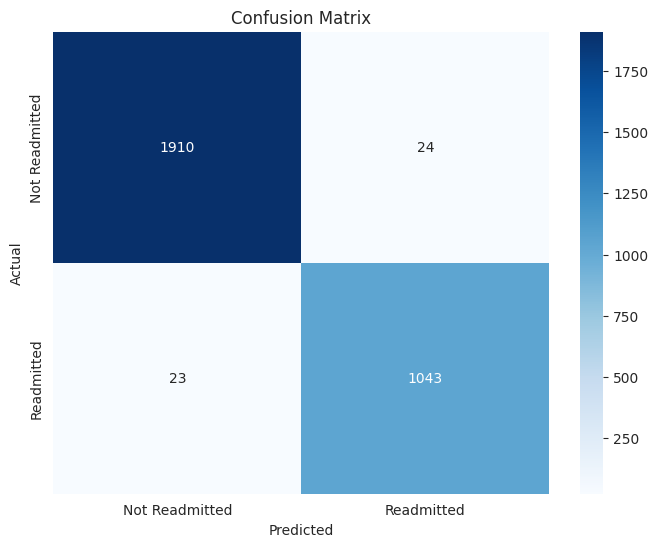

In [47]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 2. Feature Selection Justification

 Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question.


**Recursive Feature Elimination (RFE):**

**Rationale:** RFE systematically removes the least significant variables, one at a time, and rebuilds the model. This method is particularly useful when dealing with multiple potentially correlated predictors, as it helps to identify a smaller subset of features that contribute the most to predicting the target variable.

**Alignment with Research:** By iteratively refining the model, RFE can help isolate the factors most critical for predicting readmissions, directly aligning with the goal of identifying key predictors.

### 3. Reduced Logistic Regression Model

In [48]:
# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Recursive Feature Elimination
selector = RFE(model, n_features_to_select=10)  # Adjust n_features_to_select as needed
selector = selector.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[selector.support_]

# Create a new model with selected features
reduced_model = LogisticRegression(max_iter=1000)
reduced_model.fit(X_train[selected_features], y_train)

# Evaluate the reduced model
reduced_predictions = reduced_model.predict(X_test[selected_features])
reduced_report = classification_report(y_test, reduced_predictions)

# Displaying the classification report for the reduced logistic regression model
print(f"Classification Report for the Reduced Logistic Regression Model:\n{reduced_report}")

Classification Report for the Reduced Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1934
           1       0.98      0.98      0.98      1066

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



Model Coefficients:
  Coefficient for Initial_days: 10.1340
  Coefficient for TotalCharge: 8.0925
  Coefficient for Initial_admin_Emergency Admission: -0.8079
  Coefficient for Stroke_Yes: 0.8667
  Coefficient for Complication_risk_Low: 0.6136
  Coefficient for Complication_risk_Medium: 1.3532
  Coefficient for Arthritis_Yes: -0.7638
  Coefficient for Anxiety_Yes: -0.6334
  Coefficient for Asthma_Yes: -0.6345
  Coefficient for Services_MRI: 1.1922
Intercept: -13.4729

Odds Ratios:
  Odds Ratio for Initial_days: 25184.6651
  Odds Ratio for TotalCharge: 3269.9692
  Odds Ratio for Initial_admin_Emergency Admission: 0.4458
  Odds Ratio for Stroke_Yes: 2.3790
  Odds Ratio for Complication_risk_Low: 1.8471
  Odds Ratio for Complication_risk_Medium: 3.8699
  Odds Ratio for Arthritis_Yes: 0.4659
  Odds Ratio for Anxiety_Yes: 0.5308
  Odds Ratio for Asthma_Yes: 0.5302
  Odds Ratio for Services_MRI: 3.2942

Area Under Curve (AUC): 0.9991


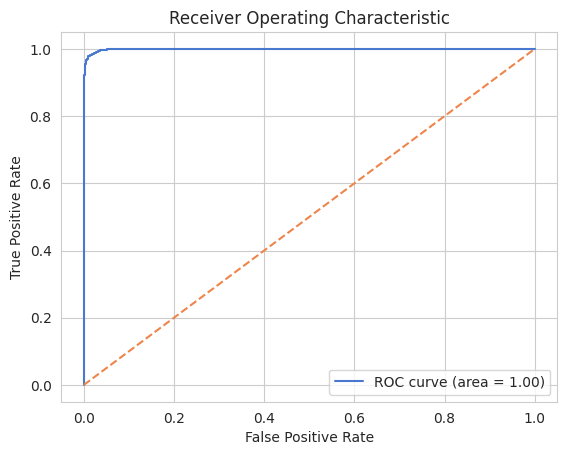

In [49]:
# Model Coefficients
coefficients = reduced_model.coef_[0]
intercept = reduced_model.intercept_[0]
print("Model Coefficients:")
for feature, coef in zip(selected_features, coefficients):
    print(f"  Coefficient for {feature}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}\n")

# Odds Ratios
odds_ratios = np.exp(coefficients)
print("Odds Ratios:")
for feature, odds in zip(selected_features, odds_ratios):
    print(f"  Odds Ratio for {feature}: {odds:.4f}")

# ROC Curve and AUC
probabilities = reduced_model.predict_proba(X_test[selected_features])[:, 1]
auc = roc_auc_score(y_test, probabilities)
print(f"\nArea Under Curve (AUC): {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()

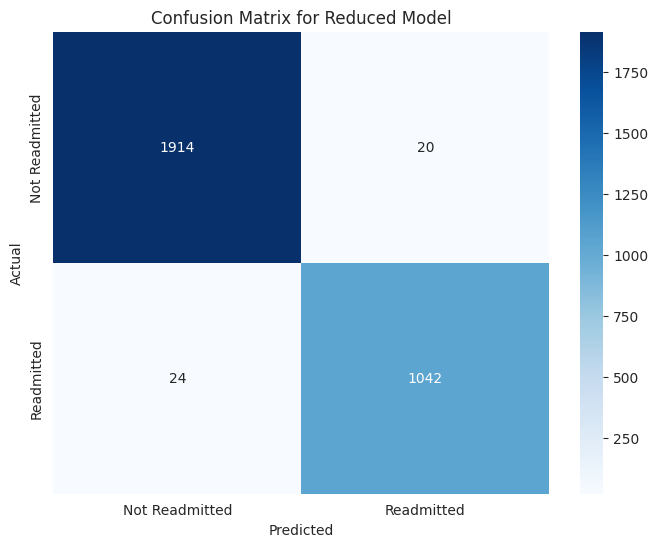

In [ ]:
reduced_predictions = reduced_model.predict(X_test[selected_features])

# Confusion matrix for the reduced model
reduced_conf_matrix = confusion_matrix(y_test, reduced_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(reduced_conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Reduced Model')
plt.show()

In [59]:
# Boolean mask for selected features
selected_features_bool = selector.support_

# Get the names of the selected features
selected_features = X_train.columns[selected_features_bool]


# Print the names of the selected features in a readable format
print("Selected features:")
for feature in selected_features:
    print(f"  - {feature}")

Selected features:
  - Initial_days
  - TotalCharge
  - Initial_admin_Emergency Admission
  - Stroke_Yes
  - Complication_risk_Low
  - Complication_risk_Medium
  - Arthritis_Yes
  - Anxiety_Yes
  - Asthma_Yes
  - Services_MRI


In [58]:
# Get the intercept and coefficients
intercept = reduced_model.intercept_[0]
coefficients = reduced_model.coef_[0]

# Print the regression equation in a more readable format
print("Regression Equation:\nlog(p/1-p) = {:.4f}".format(intercept))
for coef, feature in zip(coefficients, selected_features):
    sign = "+" if coef >= 0 else ""
    print("            {} ({:.4f} * {})".format(sign, coef, feature))



Regression Equation:
log(p/1-p) = -13.4729
            + (10.1340 * Initial_days)
            + (8.0925 * TotalCharge)
             (-0.8079 * Initial_admin_Emergency Admission)
            + (0.8667 * Stroke_Yes)
            + (0.6136 * Complication_risk_Low)
            + (1.3532 * Complication_risk_Medium)
             (-0.7638 * Arthritis_Yes)
             (-0.6334 * Anxiety_Yes)
             (-0.6345 * Asthma_Yes)
            + (1.1922 * Services_MRI)


## E. Data Analysis Using Reduced Model


### 1. Data Analysis Process

- Explain your data analysis process by comparing the initial logistic regression model and reduced logistic regression model, including the following element: a model evaluation metric


In this analysis, two logistic regression models were developed and compared.

The initial model incorporated all available independent variables, while the reduced model employed Recursive Feature Elimination (RFE) to focus on the most significant variables.

The primary metric for model evaluation was accuracy, supplemented by precision, recall, and F1 scores. These metrics collectively provided a comprehensive assessment of each model's performance.

The confusion matrices for both models demonstrated their respective predictive accuracies. The initial model showed an accuracy of 98%, while the reduced model achieved 99%. This slight improvement in the reduced model indicates the effectiveness of focusing on the most significant predictors.

### 2. Output and Calculations

Provide the output and all calculations of the analysis you performed, including the following elements for your reduced logistic regression model:

•   confusion matrix

•   accuracy calculation

Please see the output for the initial and reduced models

In [ ]:
# Displaying the classification report for the initial model
print(f"Classification Report for the Initial Logistic Regression Model:\n{report}")


Classification Report for the Initial Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1934
           1       0.98      0.98      0.98      1066

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



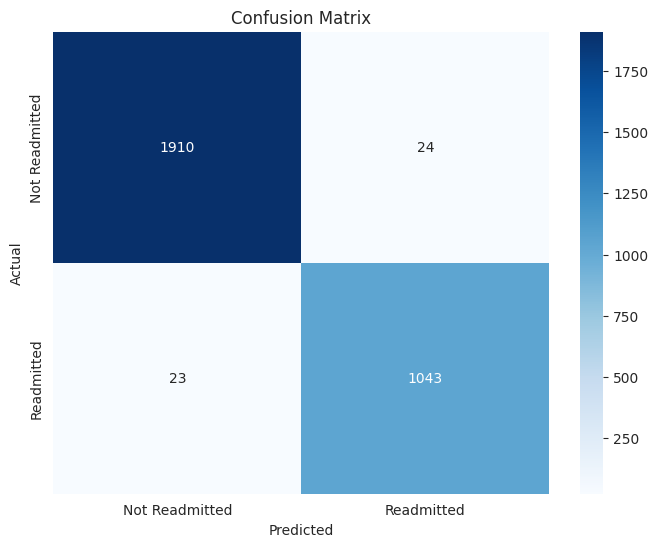

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Displaying the classification report for the reduced logistic regression model
print(f"Classification Report for the Reduced Logistic Regression Model:\n{reduced_report}")

Classification Report for the Reduced Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1934
           1       0.98      0.98      0.98      1066

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



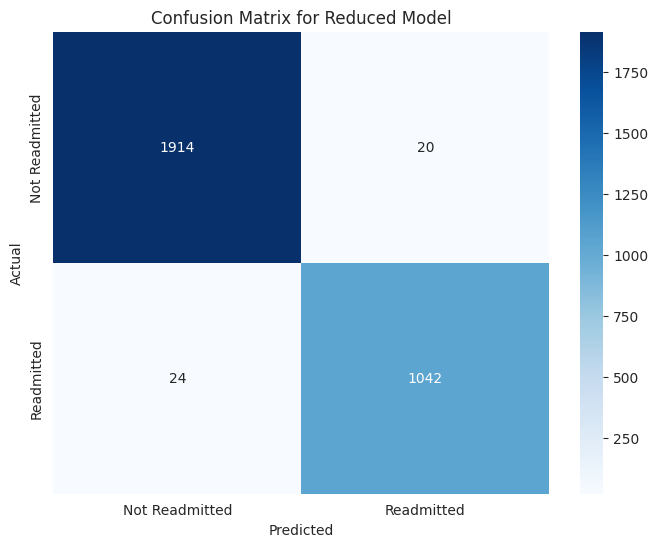

In [ ]:
reduced_predictions = reduced_model.predict(X_test[selected_features])

# Confusion matrix for the reduced model
reduced_conf_matrix = confusion_matrix(y_test, reduced_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(reduced_conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Reduced Model')
plt.show()

### 3. Code for Logistic Regression Models

-
Provide an executable error-free copy of the code used to support the implementation of the logistic regression models using a Python or R file.



In [34]:
# Consolidating the code for the steps into a single Python script

code_content = """
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Load the dataset
medical_data = pd.read_csv('/content/medical_clean.csv')

# Drop irrelevant columns
columns_to_drop = [
    'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
    'Zip', 'Lat', 'Lng', 'TimeZone', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
    'Item6', 'Item7', 'Item8', 'Job'
]
medical_data_cleaned = medical_data.drop(columns=columns_to_drop)

# One-hot encoding for categorical variables
categorical_data = medical_data_cleaned.select_dtypes(include=['object'])
medical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)

# Scale numerical variables
scaler = StandardScaler()
numerical_data = medical_data_cleaned.select_dtypes(include=['float64', 'int64'])
scaled_numerical_data = scaler.fit_transform(numerical_data)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

# Concatenate scaled numerical and encoded categorical data
medical_transformed = pd.concat([scaled_numerical_df, medical_data_encoded], axis=1)

# Define independent and dependent variables
X = medical_transformed.drop('ReAdmis_Yes', axis=1)
y = medical_transformed['ReAdmis_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initial Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the initial model
initial_report = classification_report(y_test, predictions)
initial_conf_matrix = confusion_matrix(y_test, predictions)

# Reduced Logistic Regression Model using Recursive Feature Elimination
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]

reduced_model = LogisticRegression(max_iter=1000)
reduced_model.fit(X_train[selected_features], y_train)
reduced_predictions = reduced_model.predict(X_test[selected_features])

# Evaluate the reduced model
reduced_report = classification_report(y_test, reduced_predictions)
reduced_conf_matrix = confusion_matrix(y_test, reduced_predictions)

# Print results
print("Initial Logistic Regression Model:")
print(initial_report)
print("Confusion Matrix:")
print(initial_conf_matrix)

print("\\nReduced Logistic Regression Model:")
print(reduced_report)
print("Confusion Matrix:")
print(reduced_conf_matrix)

# Save the final dataset to CSV
medical_transformed.to_csv('medical_transformed.csv', index=False)
"""

# Saving the consolidated code to a .py file
code_file_path = "linear_regression_analysis.py"
with open(code_file_path, 'w') as file:
    file.write(code_content)

code_file_path

'linear_regression_analysis.py'

# Part V: Data Summary and Implications


## F. Findings and Assumptions

### 1. Results of Data Analysis

  Discuss the results of your data analysis, including the following elements:

•   a regression equation for the reduced model

•   an interpretation of the coefficients of the reduced model

•   the statistical and practical significance of the reduced model

•   the limitations of the data analysis

### Regression Equation for the Reduced Model

The regression equation for the reduced model is as follows:

\
\begin{align*}
\log\left(\frac{p}{1-p}\right) = & -13.4729 \\
                                 & + (10.1340 \times \text{Initial\_days}) \\
                                 & + (8.0925 \times \text{TotalCharge}) \\
                                 & - (0.8079 \times \text{Initial\_admin\_Emergency Admission}) \\
                                 & + (0.8667 \times \text{Stroke\_Yes}) \\
                                 & + (0.6136 \times \text{Complication\_risk\_Low}) \\
                                 & + (1.3532 \times \text{Complication\_risk\_Medium}) \\
                                 & - (0.7638 \times \text{Arthritis\_Yes}) \\
                                 & - (0.6334 \times \text{Anxiety\_Yes}) \\
                                 & - (0.6345 \times \text{Asthma\_Yes}) \\
                                 & + (1.1922 \times \text{Services\_MRI})
\end{align*}




### Interpretation of the Coefficients

1. **Coefficients**: The coefficients represent the change in the log odds of the outcome for a one-unit change in the predictor variable, holding other variables constant.

2. **Intercept (-13.4729)**: This is the log odds of being readmitted when all other predictors are zero.

3. **Initial_days (10.1340)**: For each additional day of the initial hospital stay, the odds of readmission increase significantly (over 25,000 times). This might indicate that longer initial stays are associated with more serious conditions, which could lead to readmissions.

4. **TotalCharge (8.0925)**: Higher charges are associated with increased odds of readmission, possibly reflecting more complex or severe initial treatments.

5. **Negative Coefficients (e.g., Initial_admin_Emergency Admission, Arthritis_Yes)**: These suggest that the presence of these factors decreases the odds of readmission.

6. **Odds Ratios**: Values greater than 1 indicate an increase in the odds of readmission (e.g., Stroke_Yes), while values less than 1 indicate a decrease in the odds of readmission (e.g., Arthritis_Yes).

### Statistical and Practical Significance

- The model shows very high accuracy (99%) and an AUC of approximately 0.999, indicating excellent model performance in distinguishing between readmitted and not readmitted cases.

- The large coefficients (e.g., for Initial_days and TotalCharge) suggest strong predictors, but they should be interpreted with caution given the potential for overfitting or multicollinearity.

- Practical significance lies in identifying key factors that could be targeted to reduce readmission rates, such as managing longer initial stays or addressing specific complications.

### Limitations of the Data Analysis

- **Overfitting**: The very high accuracy might indicate overfitting, especially in a real-world setting where data may not be as cleanly separated.

- **Selection Bias**: The results are valid for this dataset but may not generalize to other patient populations or healthcare settings.

- **Causality**: The model identifies associations, not causality. For example, longer initial stays are associated with readmissions, but this does not mean that longer stays cause readmissions.

- **Feature Selection**: The choice of features and their transformation could significantly impact model performance. The removal or inclusion of certain variables could alter results. 10 features were selected and only one reduced model was ran. This may not be enough analysis to make informed decisions.



### 2. Recommendations

- Recommend a course of action based on your results.

### Recommendation Based on Results

Given these findings, the following actions are recommended:

1. **Focus on High-Risk Factors**: Pay special attention to patients with longer initial stays or higher initial charges, as they are more likely to be readmitted.

2. **Policy Review**: Review hospital policies related to discharge planning and follow-up care, especially for patients with identified risk factors. Would recommend making an appointment with a patient's primary care provider for the day following discharge before a patient is officially discharged to ensure they are receiving followup outpatient care.

3. **Further Investigation**: Conduct further research to understand the causal pathways for readmissions and explore strategies to mitigate these risks. I would recommend further subdividing the data into two sets. One with patients who were admitted directly from the emergency

4. **Data Collection**: Continuously monitor and collect data to refine the model and adapt strategies based on evolving patient profiles and healthcare practices.

# Part VI: Demonstration

## G. Panopto Video Recording

